# Comparison of Solutions for Markov Decision Processes

## Introduction

Markov Decision Processes (MDPs) provide a mathematical formulation for stochastic sequential decision making. Stochastic sequential decision making is prominent in fields such as economics, control systems, urban planning, and communications [Puterman]. 

In this project, we will be comparing a variety of classic dynamic programming and linear programming methods to solve MDPs. From the dynamic programming realm, the solution methods are:
-  Value Iteration
-  Policy Iteration

and for linear programming methods:
-  First order methods
    -  Projected Gradient Method
    -  Projected Accelerated Gradient Method
-  Interior point method
-  Simplex method
-  CVXPY toolset (SCS, ECOS, CVXOPT)


### Problem Formulation
$\textbf{Definition 1:}$ A Markov decision process (MDP) is a tuple $\mathcal{M}=(S,s_0,A,P)$ where $S$ is the finite set of states, i.e., $|S|=n$, $s_0\in S$ is the initial state, $A$ is the finite set of actions, i.e. $|A|=a$, and $P: S\times A \rightarrow[0,1]^{n}$ is the transition function. For any given $(s,a)$, $P$ satisfies $\sum_{t\in S}P(t| s,a)=1$ and $P(t | s,a)\geq 0$. Assume for simplicity that all actions are available in all states.

An infinite run from the initial state $s_0$ is a sequence $\rho$$=$$s_0a_0s_1a_1s_2...$ of states and actions such that for all $k\geq 0$, we have $P(s_{k+1}|s_k,a_k)$$>$$0$. A policy specifies a procedure for action selection in each state depending on the history of states and actions. A deterministic policy is a function $\pi : S \rightarrow A$ that maps the set of states into the set of available actions for the input state. For a given MDP $\mathcal{M}$, we denote the set of all possible deterministic policies by $\Pi(\mathcal{M})$.

To define a reward maximization problem, we relate each state transition with a real valued reward, using the reward function $r : S\times A\times S \rightarrow \mathbb{R}$. Then, the expected total reward of an infinite horizon decision process following the policy $\pi$ is given as follows,

$\begin{align}
V^{\pi}(s)=\lim_{N\rightarrow \infty}\mathbb{E}\Big[\sum_{k=0}^{N-1}\alpha^kr(s_i,\pi(s),s_{i+1}) \ \Big| \ i_0=s_0\Big]
\end{align}$ $\forall s\in S$

where $V^{\pi}(s)$ is the value of state $s$ under the policy $\pi$. 


Suppose that our aim is to find a policy that maximizes the expected total reward. The Bellman equation and optimality conditions provide the following formulation to compute maximum values for states and corresponding actions which achieves the maximum reward values,

$\begin{align}
V^{\star}(s)&=\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big]\\
\pi^{\star}(s)&=\arg\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V^{\star}(t)\Big]\\
\end{align}$

Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^n$ be an operator defined as,

$(TV)(s)=\max_{a}\sum_{t\in S}P(t \ | \ s,a)\Big[r(s,a,t)+\alpha V(t)\Big]$.

Then, the optimality condition is given by $TV^{\star}=V^{\star}$. Additionally, from well known results, $T$ is a monotone operator and a contraction mapping. Hence, it satisfies that (i) for any $V$ satisfying $V\geq TV$, $V\geq V^{\star}$ where inequalities are elementwise, (ii) it has a unique solution to $V^{\star}=TV^{\star}$ . Using this fact, and defining $r(s,a)=\sum_{t\in S}P(t \ | \ s,a)r(s,a,t)$, we can formulate finding the maximum expected reward problem as a linear program as following,

$\begin{align}
\min \ \ &c^TV\\
\text{subject to}: \ \ & V(s)\geq r(s,a)+\alpha\sum_{t\in S}P(t \ | \ s,a)V(t)
\end{align}$

where $c\in\mathbb{R}_{++}^n$. Having $c>0$ for each state ensures the uniqueness of the solution. Let $P_{a_1}\in[0,1]^{n\times n}$ be a transition matrix for action $a_1$. We define the following matrices,

$\begin{align}
A=\begin{bmatrix}
I_{n\times n}-\alpha P_{a_1}\\
I_{n\times n}-\alpha P_{a_2}\\
...\\
I_{n\times n}-\alpha P_{a_a}
\end{bmatrix}
\end{align}$ ,
$\begin{align}
b=\begin{bmatrix}
r(s_1,a_1),&
r(s_2,a_1),&
...,&
r(s_n,a_1),&
r(s_1,a_2),&
...,&
r(s_n,a_2),&
...,&
r(s_1,a_a),&
...,&
r(s_n,a_a)
\end{bmatrix}^T
\end{align}$.

Then the problem becomes,

$\begin{align}
\min \ \ &c^TV\\
\text{subject to}: \ \ & AV\geq b
\end{align}$

#### Dual Program

The Lagrangian for the primal problem is given by,

$\begin{align}
\mathcal{L}(V,\lambda)=c^TV+\lambda^T(b-AV)
\end{align}$
where the dual variable $\lambda\in\mathbb{R}^{na}$. Hence, the dual problem is,

$\begin{align}
\max & \ \ \lambda^Tb\\
\text{Subject to} :&\ \  A^T\lambda-c=0\\
&\ \  \lambda\geq 0
\end{align}$,
or writing explicitly,  


$\begin{align}
\max & \ \ \sum_{a\in A}\sum_{s\in S}\lambda(s,a)b(s,a)\\
\text{Subject to} :&\ \  \sum_{a\in A}\lambda(s,a)-\alpha\sum_{t\in S}\sum_{a\in A}P(s \ | \ t,a)\lambda(t,a)=c(s)\ \ \ \forall \ \ s\in S\\
&\ \  \lambda(s,a)\geq 0\ \ \ \forall s\in S, \ \ a\in A
\end{align}$

where $\lambda(s,a)$ variables intuitively represent the expected residence time in a state action pair. Although the deterministic policies are at least as good as randomized policies for examples we are going to use, note that the use of dual program provides an efficient way to extract the randomized policies from the output. Using the dual program, the optimal policy for each state can be obtained by using,

$\begin{align}
P(a \ | \ s)= 
\begin{cases} \frac{\lambda(s,a)}{\sum_{a\in A}\lambda(s,a)}& \text{if} \sum_{a\in A}\lambda(s,a)\neq 0\\
\text{arbitrary} & \text{if} \sum_{a\in A}\lambda(s,a)= 0\end{cases}
\end{align}$

In [1]:
# Required Packages

import numpy as np
import math as m
import time
import numpy.linalg as la
from scipy.optimize import linprog
import numpy.random as rn
import matplotlib.pyplot as plt
from cvxpy import *
import cvxpy as cvx

## Generating the MDP
Grid world examples are straight forward MDPs to scale and to compare the convergence performance for each proposed MDP solution method. The Grid world example has rewards, which the agent wishes to acquire, and negative rewards, which the agent wishes to avoid.

The following code generates an $n \ x \ m$ Grid world and allows the agent to choose between five possible actions in each state, namely, left, right, up, down and stay. Once the agent chooses an action, the next state is determined stochastically with some probability. The chosen state is attained at a probability $p$, and the other four potential states have a probablity of $\frac{1-p}{4}$.
#### Grid World Transitions

In [2]:
# This is the grid world generator with 5 possible actions for the agent i.e. (left,right,up,down,loop).
# Inputs:
# Row: Number of rows of the grid world
# Col: Number of columns of the grid world
# Prob: Probability of taking the desired action
# Output:
# P_0: Transition matrix with dimensions 5 x (Row x Col) x (Row x Col)  

# When an action is chosen by the agent, it is performed with probability Prob and the remaining (1-Prob) probability
# is distributed among other actions. This property is included to introduce stochasticity.
# Output matrix is formed in a way that 0th row of the matrix represent transitions from the  bottom left corner 
# of the grid world. Similarly, the last row is for the upper right corner ((Row x Col)th grid).

def Grid_world(Row,Col,Prob):
    State=Row*Col
    Actions=5
    np.random.seed(0)
    prob=Prob
    P_0=np.zeros((Actions,State,State))
    #action left
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[0,i,i]=prob+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i+Col]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[0,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[0,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i+1]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i+Col]=(1-prob)/4
                    P_0[0,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[0,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[0,i,i-1]=prob
                    P_0[0,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[0,i,i]=(1-prob)/4+(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i-Col]=(1-prob)/4
            else:
                P_0[0,i,i]=(1-prob)/4
                P_0[0,i,i-1]=prob
                P_0[0,i,i+1]=(1-prob)/4
                P_0[0,i,i-Col]=(1-prob)/4
                P_0[0,i,i+Col]=(1-prob)/4
    # action right
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i+Col]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[1,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i+1]=prob
                    P_0[1,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[1,i,i]=prob+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i+Col]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[1,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[1,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[1,i,i-1]=(1-prob)/4
                    P_0[1,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[1,i,i]=(1-prob)/4+(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i-Col]=(1-prob)/4
            else:
                P_0[1,i,i]=(1-prob)/4
                P_0[1,i,i-1]=(1-prob)/4
                P_0[1,i,i+1]=prob
                P_0[1,i,i-Col]=(1-prob)/4
                P_0[1,i,i+Col]=(1-prob)/4
    # action up
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                    P_0[2,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                if i==State-Col:
                    P_0[2,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i+1]=(1-prob)/4
                    P_0[2,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                    P_0[2,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[2,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i+Col]=prob
                if i==State-1:
                    P_0[2,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[2,i,i-1]=(1-prob)/4
                    P_0[2,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[2,i,i]=(1-prob)/4+(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i+Col]=prob
            elif i>(Row-1)*Col and i<State-1:
                P_0[2,i,i]=prob+(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i-Col]=(1-prob)/4
            else:
                P_0[2,i,i]=(1-prob)/4
                P_0[2,i,i-1]=(1-prob)/4
                P_0[2,i,i+1]=(1-prob)/4
                P_0[2,i,i-Col]=(1-prob)/4
                P_0[2,i,i+Col]=prob
    # action down
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
                if i==0:
                    P_0[3,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i+1]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
                if i==Col-1:
                    P_0[3,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[3,i,i]=(1-prob)/4+(1-prob)/4+(1-prob)/4
                    P_0[3,i,i-1]=(1-prob)/4
                    P_0[3,i,i-Col]=prob
            elif i>0 and i<Col-1:
                P_0[3,i,i]=prob+(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[3,i,i]=(1-prob)/4+(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i-Col]=prob
            else:
                P_0[3,i,i]=(1-prob)/4
                P_0[3,i,i-1]=(1-prob)/4
                P_0[3,i,i+1]=(1-prob)/4
                P_0[3,i,i-Col]=prob
                P_0[3,i,i+Col]=(1-prob)/4
    # action loop
    for i in range(P_0.shape[1]):
            if i%Col==0:
                if i!=0 and i!=State-Col:
                    P_0[4,i,i]=prob+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
                if i==0:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                if i==State-Col:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i+1]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
            elif i%Col==Col-1:
                if i!=Col-1 and i!=State-1:
                    P_0[4,i,i]=prob+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
                if i==Col-1:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i+Col]=(1-prob)/4
                if i==State-1:
                    P_0[4,i,i]=prob+(1-prob)/4+(1-prob)/4
                    P_0[4,i,i-1]=(1-prob)/4
                    P_0[4,i,i-Col]=(1-prob)/4
            elif i>0 and i<Col-1:
                P_0[4,i,i]=prob+(1-prob)/4
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i+Col]=(1-prob)/4
            elif i>(Row-1)*Col and i<State-1:
                P_0[4,i,i]=prob+(1-prob)/4
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i-Col]=(1-prob)/4
            else:
                P_0[4,i,i]=prob
                P_0[4,i,i-1]=(1-prob)/4
                P_0[4,i,i+1]=(1-prob)/4
                P_0[4,i,i-Col]=(1-prob)/4
                P_0[4,i,i+Col]=(1-prob)/4
    return P_0

#### Problem Formulation and Constraints for the Linear Program

In [96]:
  def Primal_parameters_1(rows,columns,prob,discount,tolerance):
    States=rows*columns
    P_0=Grid_world(rows,columns,prob)
    A=np.zeros((5*States,States)) # 5 is number of actions !
    b=np.zeros((5*States,1))
    # initial distributions USE 1 for each state to ensure the converge to the unique solution!
    c=np.ones(States)
    # Constraints  Ax>=b
    for a in range(5):
        A[a*States:(a+1)*States,:]=np.eye(States)-discount*P_0[a,:,:]
    # assign reward=1 to the top right cell and zero reward to others
    for a in range(5):
        b[(a+1)*(States)-1]=0.5
        b[(a+1)*(States)-1-13]=-1
        b[(a+1)*(States)-1-17]=-1
    return A,b,c,P_0
  def Dual_parameters_1(A,b,c):
    return A.T,b,c

## Methods 
The following codes are methods we use to solve 'given an MDP and a reward structure, find the optimal state values and policies achieving it' problem. First, we find the optimal states values and a policy achieving it by the policy iteration algorithm. Then using its results, we keep the log of relative error values of each iteration for other methods. The elapsed time when using different methods are all measured using 'time.time()' function. 

We also solve the dual problem using different methods

#### 1) Policy Iteration

Value iteration is an application of Dynamic Programming and it is one the most understood and used algortihms to solve MDPs. The algorithm starts with arbitrary initial values of states. Due to the discount factor any point can be used as an initial point. In an iteration, for each state it finds the best action which maximizes the state value, using the old state values. After all state values are recalculated, a new iteration starts with the updated state values. The algorithm terminates when the difference between old and updated state value are below a threshold. [PUTERMAN]


In [4]:
def policyitr(P, R, discount, eps):
    start_time = time.time()
    numOfStates = P.shape[2]
    numOfActions = P.shape[0]
    bestActionOld =  -1*np.ones(numOfStates)
    bestActionNew = np.random.randint(numOfActions, size=numOfStates)
    stateVals = np.zeros([numOfStates, 1]);
    vals = []; #to keep state values;
    #stops if the last two polies are same or
    df = np.zeros(1)
    df[0] = 1
    num_iter=0
    while not(np.array_equal(bestActionOld, bestActionNew) or la.norm(df,2) < eps):
        num_iter+=1
        bestActionOld =np.copy(bestActionNew);
        #constructs linear equation to find new values of states
        A = np.zeros([numOfStates, numOfStates])
        #if there are rewards for actions this line must be changed
        b = R;
        b.resize([numOfStates,1])
        for s in range(numOfStates):
            ts = discount*P[bestActionNew[s],s,:];
            ts.resize([1,numOfStates]);
            A[s,:] = -ts;
        #update the state values and continue
        A = A + np.identity(numOfStates);
        stateValsNew = np.linalg.solve(A,b);
        df = stateValsNew-stateVals;
        stateVals = stateValsNew
        vals.append(stateVals)
        #for each state maximize the value
        for s in range(numOfStates):
            maxVal = -np.inf;
            bestActOfs = -1;
            #search every action
            for a in range(numOfActions):
                successors = np.where(P[a,s,:] > 0)
                valOfa = R[s] + discount*np.dot(np.squeeze(stateVals[successors]), np.squeeze(P[a,s,successors]))
                if valOfa > maxVal:
                    maxVal = valOfa;
                    bestActOfs = a;
            bestActionNew[s] = bestActOfs
    error = []
    for i in range(len(vals)):
        error.append(np.linalg.norm(vals[i] - vals[-1], 2))
    elapsed_time = time.time() - start_time
    return stateVals, bestActionNew, error, num_iter, elapsed_time

## Policy Iteration

Policy iteration is a well-known method to solve infinite horizon MDPs, which are known to have a stationary policy to maximize the objective function. The algorithm starts with an arbitrary deterministic policy, which induces a Markov Chain, or, in other words, each state brings only one constraint. After a policy is generated, it is evaluated to determine the new state values, which is subsequently used to determine the best actions and a new policy is generated. The new policy is generated such that it maximizes the state values of the new state values. The policy iteration algorithm terminates when the policy converges, i.e., the previous policy is identical to the current policy. [PUTERMAN] The main difference between this method and value iteration method is that value iteration method uses the old state values to update state values and relies on the convergence of state values, policy iteration method analytically calculates the state values at each step. Analytical computation of state values has complexity,$O(n^3)$, and causes problems when the number of states is relatively high.

In [5]:
def valitr(P, R, discount, eps):
    start_time = time.time()
    numOfStates = P.shape[2]
    numOfActions = P.shape[0]
    stateVals = np.zeros(numOfStates)
    bestAction = np.zeros(numOfStates)
    #df is the stopping criteria
    df = np.zeros(1)
    df[0] = 1
    num_iter=0
    while la.norm(df,2) > eps:
        stateValsNew = np.zeros(P.shape[2])
        num_iter+=1
        #for each state maximize the value
        for s in range(numOfStates):
            maxVal = -np.inf;
            bestActOfs = -1;
            #search every action
            for a in range(numOfActions):
                successors = np.where(P[a,s,:] > 0)
                valOfa = R[s] + discount*np.dot(stateVals[successors], np.squeeze(P[a,s,successors]))
                if valOfa > maxVal:
                    maxVal = valOfa;
                    bestActOfs = a;
            bestAction[s] = bestActOfs
            stateValsNew[s] = maxVal;
        #update the state values and continue
        df = stateValsNew - stateVals
        stateVals = stateValsNew
        
    stateVals = np.resize(stateVals, (numOfStates,1))
    elapsed_time = time.time() - start_time
    return stateVals, bestAction, num_iter, elapsed_time

#### 3) CVXPY Solvers for the primal problem

In [6]:
def ECOS_Primal(A,b,c,tol):
    start_time = time.time()
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=ECOS,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def SCS_Primal(A,b,c,tol):
    start_time = time.time()
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=SCS,eps=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def CVXOPT_Primal(A,b,c,tol):
    start_time = time.time()
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y>=b]
    objective=cvx.Minimize(cvx.sum_entries(cvx.mul_elemwise(c,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=CVXOPT,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value ,Y.value, elapsed_time

#### 4) CVXPY Solvers for the dual problem

In [7]:
def ECOS_Dual(A,b,c,tol):
    start_time = time.time()
    Y=cvx.Variable(A.shape[1]) # number of states
    print(A.shape)
    cons=[A*Y==c,
         Y>=0]
    objective=cvx.Maximize(cvx.sum_entries(cvx.mul_elemwise(b,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=ECOS,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def SCS_Dual(A,b,c,tol):
    start_time = time.time()
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y==c,
         Y>=0]
    objective=cvx.Maximize(cvx.sum_entries(cvx.mul_elemwise(b,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=SCS,eps=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time
def CVXOPT_Dual(A,b,c,tol):
    start_time = time.time()
    Y=cvx.Variable(A.shape[1]) # number of states
    cons=[A*Y==c,
         Y>=0]
    objective=cvx.Maximize(cvx.sum_entries(cvx.mul_elemwise(b,Y)))
    prob=cvx.Problem(objective,cons)
    prob.solve(solver=CVXOPT,reltol=tol,max_iters=1000,verbose=False)
    elapsed_time = time.time() - start_time
    #print ("status: %s" % prob.status)
    #print ("optimal value %s" % objective.value)
    return objective.value, Y.value, elapsed_time

#### Projection Function
Both gradient descent and accelerated gradient method requires a projection such that the solution is a feasible point in the constraining set. Due to the nature of the linear program, the constraining set is a set of $ (n \cdot m \cdot a)$ affine inequalities $ Ax \geq b$. A projection onto this constraining set is difficult, and so an approximate method called alternating projection method. 

The alternating projection method requires a set of closed, convex sets, however, this can be extended to a set of constraining affine inequalities [Boyd]. The method finds all of the affine inequalities that are violated by the current value $z$, and for those inequality constraints determines the projection onto the individual half-space defined by the constraint. For the constraints that are not violated, the projection is just $z$. 

In [8]:
def proj(y, A, b):
    x = y
    maxIter = 1000
    j = 0
    while np.min(np.dot(A,x) - b) < 0 and j <= maxIter:
        # find the constraints that are violated
        constrainedBool = np.greater_equal(np.dot(A, x), b)
        
        # for each violated constrained perform the projection
        for i in range(constrainedBool.shape[0]):
            if not np.all(constrainedBool[i]):
                # intermediate residual
                qq=(b[i] - np.dot(A[i,:], x))
                
                # projection
                x = x + np.reshape(qq[0]*A[i,:]/np.dot(A[i,:].T, A[i,:]), (x.shape[0],x.shape[1]))
        # iteration counter
        j = j + 1
    return x

### Projected Gradient Descent
Projected gradient descent updates the state values and then projects the state values onto the constraining set using the above projection.

In [9]:
def graddes(x, A, b, t, eta0):
    eta = eta0/np.sqrt(t + 1)
    # gradient is always a vector of ones of shape x.shape
    grad = np.ones((x.shape[0], 1))
    y = x - eta*grad

    x = proj(y, A, b)

    return x

### Projected Accelerated Gradient Method
The accelerated gradient method performs the same general algorithm as projected gradient descent, however, accelerated gradient method uses the "momentum" of the gradient update to nudge the new solution in the same direction of the gradient. Accelerated gradient methods have faster convergence rates than gradient descent methods. 

In [10]:
def accelgrad(x, v, theta, A, b, t, eta0):
    eta = eta0/np.sqrt(t+1)
    grad = np.ones(x.shape)
    
    v = v - eta*grad
    
    theta_old = theta
    theta = (1 + np.sqrt(1 + 4*theta**2))/2
    
    xprev = x
    x = proj(v, A, b)
    
    v = x + (theta_old - 1)/(theta)*(x - xprev)
    
    return x, v, theta

In [11]:
def descent(update, update_name, x, A, b, eta0, tol, optVal, T=int(1e4)):
    v = x
    theta = 1.
    error = []
    
    t = int(0)
    xnew = x + 1;
    while t <=  T and la.norm(x - xnew, 2) > tol:
        x = xnew
        if update_name == "gradient":
            xnew = update(x, A, b, t, eta0)
            
        elif update_name == "accelerated":
            xnew, v, theta = update(x, v, theta, A, b, t, eta0)
            
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(x - optVal,2))
        t = int(t + 1)
    
    return x, error, t

## Interior Point Method (Barrier Method)

Barrier Method is an Interior Point Method to solve convex optimization problems with inequality constraints. In Barrier method, the constarints are added to the main problem as an extra function. This extra function goes to infinity when the optimized variable gets closer to the boundaries of the convex set i.e. it encourages the variable to stay in the feasible region. The algorithm starts from the analytical center which minimizes the barrier function. As the number of iterations increases, the original function becomes comparable with the barrier function and the optimized variable gets closer to the boundaries more. In this project the barrier function is chosen to be logarithmic. 

In [12]:
def findBarrierGradient(A,b,x):
    #calculates the gradient of barrier function for IPM Ax>=b
    d = np.zeros([A.shape[0],1])
    for i in range(A.shape[0]):
        d[i,0] = -1.0/(np.dot(A[i,:],x) - b[i])
    g = np.dot(np.transpose(A),d)
    return g

In [13]:
def findBarrierHessian(A,b,x):
    #calculates the hessian of barrier function for IPM Ax>=b
    d = np.zeros([A.shape[0],1])
    dMat = np.zeros([A.shape[0],A.shape[0]])
    for i in range(A.shape[0]):
        dMat[i,i] = 1.0/((np.dot(A[i,:],x) - b[i])**2)  
    dummy = np.dot(np.transpose(A),dMat)
    H = np.dot(dummy,A)
    return H

In [14]:
def findAnalyticCenter(A,b,xFeasible,T):
    #finds the analytical center for IPM using gradient descent
    for i in range (T):
        g = findBarrierGradient(A,b,xFeasible)
        xFeasible = xFeasible - 0.01/(i+1)*g;
    return xFeasible

In [92]:
def findOptimalSolution(A,b,stateValsNew,alpha,eps, stateValsOpt):
    #finds the optimal solution using IPM
    error = []
    t = 1;
    #to make it enter the loop
    stateVals = stateValsNew + 1;
    itr = 0;
    while (np.linalg.norm(stateVals-stateValsNew,2) > eps):
        itr+=1
        print(itr)
        stateVals = stateValsNew
        print(np.min(np.dot(A,stateVals)-b))
        #Finds the gradient and hessian
        g = t*np.ones([stateVals.size, 1]) + findBarrierGradient(A,b,stateVals)
        H = findBarrierHessian(A,b,stateVals)
        #Updates the calues
        stateValsNew = stateVals - np.dot(np.linalg.inv(H),g)
        #stateValsNew = stateVals - 1/np.sqrt(itr)*g;
        error.append(np.linalg.norm(stateValsNew - stateValsOpt,2))
        t = t*(1+alpha)
        if np.isnan(error[-1]):
                return stateVals , error
    return stateVals, error


In [16]:
def interiorPoint(A, b, discount, eps, alpha, stateValsOpt):
    #finds another feasible point using the optimal solution
    xFeasible = stateValsOpt +1;
    #finds analytical center
    xF = findAnalyticCenter(A,b,xFeasible,1000);
    stateVals, error = findOptimalSolution(A,b,xF,alpha,eps, stateValsOpt)
    return stateVals, error

In [17]:
def plotGridWorld(Vals, bestAction, Rows, Columns):
    imgData = np.resize(Vals,[Rows, Columns]);
    imgData = np.flipud(imgData);    
    plt.imshow(imgData, interpolation='nearest')
    bestAction = np.resize(bestAction,[Rows, Columns])
    for a in range(Rows):
        for b in range(Columns): 
            if bestAction[Rows -1 - a,b]== 0:
                plt.text(b,a ,r'$ \leftarrow $')
            elif bestAction[Rows -1 - a,b]== 1:
                plt.text(b,a,r'$ \rightarrow $')
            elif bestAction[Rows -1 - a,b]== 2:
                plt.text(b,a,r'$ \uparrow $')
            elif bestAction[Rows -1 - a,b] == 3:
                plt.text(b,a,r'$ \downarrow $')
            elif bestAction[Rows -1 - a,b] == 4:
                plt.text(b,a ,r'$ o $')
            #plt.text(b,a,r'$ \leftarrow $')
            
    plt.colorbar()
    plt.show()
def Grid_Map(R, Rows, Columns):
    imgData = np.resize(R,[Rows, Columns]);
    imgData = np.flipud(imgData);    
    plt.imshow(imgData, interpolation='nearest')
    plt.colorbar()
    plt.show()

### Examples

##### 1) 5 x 5 Grid World
In the first example we use a 5 by 5 grid world example to compare the required number of iterations for different methods to achieve a desired tolerance level. The agent starts from the bottom left grid and its aim is to reach the top left grid while avoiding some of the intermediate grids. We solve this problem using (1) value iteration, (2) policy iteration, (3) simplex method, (4) cvxpy with SCS,ECOS and CVXOPT solvers, (5) projected gradient descent, (6) accelerated projected gradient descent and (7) interior point method. We assume that the agent takes the chosen action with probability 0.8, and we use the discount factor of 0.9. The desired tolerance is $10^{-7}$.

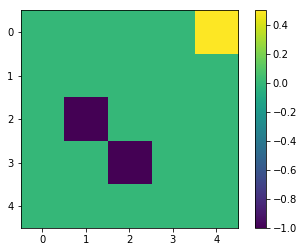

In [97]:
rows,columns,prob,discount,tol=5,5,0.8,0.9,1e-7 # Parameters for the example
A,b,c,P_0=Primal_parameters_1(rows,columns,prob,discount,tol) # Compute constraints
Grid_Map(b[0:P_0.shape[1]], rows, columns)

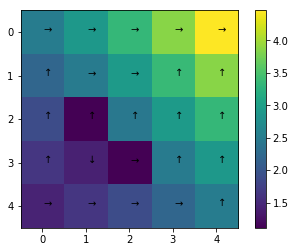

8.27640438106e-07
0.981643160618
1
0.0704761363809
2
0.106988548323
3
0.123282271447
4
0.124417216922
5
0.12156353052
6
0.118315724705
7
0.1151556931
8
0.112072338922
9
0.109065382329
10
0.106134114453
11
0.103277782108
12
0.100495574368
13
0.0977866233334
14
0.0951500048868
15
0.0925847399289
16
0.0900897960651
17
0.0876640897271
18
0.0853064887018
19
0.0830158150348
20
0.0807908482702
21
0.078630328983
22
0.0765329625571
23
0.0744974231587
24
0.0725223578536
25
0.0706063908189
26
0.0687481275966
27
0.0669461593422
28
0.0651990670227
29
0.0635054255225
30
0.0618638076195
31
0.0602727877984
32
0.0587309458743
33
0.0572368704033
34
0.0557891618618
35
0.0543864355821
36
0.0530273244358
37
0.0517104812606
38
0.05043458103
39
0.0491983227688
40
0.0480004312207
41
0.0468396582757
42
0.0457147841682
43
0.0446246184571
44
0.0435680008015
45
0.0425438015457
46
0.0415509221279
47
0.0405882953274
48
0.0396548853639
49
0.0387496878651
50
0.0378717297144
51
0.0370200687932
52
0.0361937936308
53
0.

408
0.00040882411861
409
0.000404693560347
410
0.000400605564283
411
0.00039655967518
412
0.000392555442997
413
0.000388592422833
414
0.000384670174856
415
0.000380788264242
416
0.00037694626111
417
0.00037314374046
418
0.000369380282112
419
0.000365655470648
420
0.000361968895349
421
0.000358320150136
422
0.000354708833517
423
0.000351134548525
424
0.000347596902663
425
0.000344095507851
426
0.000340629980369
427
0.000337199940802
428
0.000333805013991
429
0.000330444828977
430
0.00032711901895
431
0.000323827221199
432
0.000320569077061
433
0.000317344231874
434
0.000314152334924
435
0.000310993039398
436
0.00030786600234
437
0.000304770884601
438
0.000301707350792
439
0.00029867506924
440
0.000295673711944
441
0.000292702954528
442
0.000289762476202
443
0.000286851959712
444
0.000283971091303
445
0.000281119560676
446
0.000278297060943
447
0.000275503288592
448
0.000272737943442
449
0.000270000728605
450
0.000267291350448
451
0.000264609518552
452
0.000261954945676
453
0.00025932734

7.33857961577e-06
811
7.26589353595e-06
812
7.19392764936e-06
813
7.12267481617e-06
814
7.05212796503e-06
815
6.98228009677e-06
816
6.91312428058e-06
817
6.84465365497e-06
818
6.77686142603e-06
819
6.70974086847e-06
820
6.64328532229e-06
821
6.57748819477e-06
822
6.51234295779e-06
823
6.44784314863e-06
824
6.38398236874e-06
825
6.32075428264e-06
826
6.2581526179e-06
827
6.1961711646e-06
828
6.13480377443e-06
829
6.07404435959e-06
830
6.01388689314e-06
831
5.95432540818e-06
832
5.89535399653e-06
833
5.836966809e-06
834
5.77915805433e-06
835
5.72192199844e-06
836
5.66525296475e-06
837
5.60914533276e-06
838
5.55359353738e-06
839
5.49859206933e-06
840
5.44413547343e-06
841
5.39021834922e-06
842
5.33683534953e-06
843
5.28398117983e-06
844
5.23165059929e-06
845
5.17983841763e-06
846
5.12853949708e-06
847
5.0777487508e-06
848
5.0274611415e-06
849
4.97767168328e-06
850
4.9283754382e-06
851
4.87956751893e-06
852
4.83124308492e-06
853
4.78339734489e-06
854
4.73602555462e-06
855
4.68912301699e-06

1.34357051707e-07
1213
1.3302677504e-07
1214
1.31709669282e-07
1215
1.30405604537e-07
1216
1.29114451353e-07
1217
1.27836082164e-07
1218
1.26570370296e-07
1219
1.25317190403e-07
1220
1.24076418029e-07
1221
1.22847931161e-07
1222
1.21631607231e-07
1223
1.20427326777e-07
1224
1.19234969675e-07
1225
1.18054418241e-07
1226
1.16885555679e-07
1227
1.15728266303e-07
1228
1.14582434985e-07
1229
1.13447949035e-07
1230
1.12324695545e-07
1231
1.11212563603e-07
1232
1.10111442853e-07
1233
1.09021224493e-07
1234
1.07941800387e-07
1235
1.06873063954e-07
1236
1.05814909279e-07
1237
1.04767231113e-07
1238
1.03729926426e-07
1239
1.0270289208e-07
1240
1.01686026488e-07
1241
1.00679228954e-07
1242
9.968239989e-08
1243
9.86954404869e-08
1244
9.77182529338e-08
1245
9.67507407523e-08
1246
9.57928079082e-08
1247
9.48443596993e-08
1248
9.39053022009e-08
1249
9.29755423762e-08
1250
9.20549880767e-08
1251
9.11435481532e-08
1252
9.02411328996e-08
1253
8.93476521657e-08
1254
8.8463018022e-08
1255
8.75871425388e-0

In [98]:
polyit_val, bestAction2,error_pol, num_iter_pol, time_pol = policyitr(P_0, b[0:P_0.shape[1]], discount, tol) # Policy Iteration
valit_val, bestAction,num_iter_val, time_val = valitr(P_0, b, discount, tol) # Value Iteration
start_time = time.time()
res = linprog(c, -A, -b, A_eq=None, b_eq=None, bounds=None, method='simplex',\
              callback=None, options={'disp': False, 'bland': False, 'tol': tol, 'maxiter': 1000}) # Simplex
elapsed_time = time.time() - start_time
obj_ecos_p, ecos_val_p, time_ecos_p=ECOS_Primal(A,b,c,tol) # ECOS Primal
obj_scs_p, scs_val_p, time_scs_p=SCS_Primal(A,b,c,tol) # SCS Primal
obj_cvx_p, cvx_val_p, time_cvx_p=CVXOPT_Primal(A,b,c,tol) # CVXOPT Primal
plotGridWorld(polyit_val, bestAction2, rows, columns)
analytical_vals=findAnalyticCenter(A,b,valit_val+10,T=1000)
projgrad_val, projgrad_error, projgrad_iter = descent(graddes, "gradient", analytical_vals, A, b, 1, tol, valit_val) # Projected Gradient
accgrad_val, accgrad_error, accgrad_iter = descent(accelgrad, "accelerated", analytical_vals, A, b, 1e-1, tol, valit_val) # Accelerated Gradient Descent
print(accgrad_error[-1])
print(np.min(np.dot(A,analytical_vals)-b))
interior_val, interior_error=interiorPoint(A, b, discount, tol, 0.01, valit_val) # Interior Point Method

| Methods  | Number of Iterations | Elapsed Time (s) |
| ------------- | ------------- |------------ |
| Value Iteration  | 168  |0.01667 |
| Policy Iteration  | 5  |0.35952 |
| Simplex Method  | 75  |0.08410 |
| ECOS Solver  | 10  |0.00434 |
| SCS Solver  | >1000  |0.02763 |
| CVXOPT Solver  | 9  |0.02035 |
| Barrier Method  | Content Cell  |Elapsed Time (s) |
| Projected Gradient Descent | Content Cell  |Elapsed Time (s) |
| Acc Projected Gradient Descent  | Content Cell  |Elapsed Time (s) |

(25, 125)


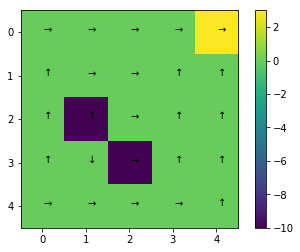

In [28]:
A_p,b_p,c_p=Dual_parameters_1(A,b,c)
obj_ecos_d, ecos_val_d, time_ecos_d=ECOS_Dual(A_p,b_p,c_p,tol) # ECOS Dual
obj_scs_d, scs_val_d, time_scs_d=SCS_Dual(A_p,b_p,c_p,tol) # SCS Dual
obj_cvx_d, cvx_val_d, time_cvx_d=CVXOPT_Dual(A_p,b_p,c_p,tol) # CVXOPT Dual
policy = np.zeros((A_p.shape[0],5))
for a in range(5):
    for i in range(A_p.shape[0]):
         policy[i,a]=cvx_val_d[a*25+i]
denum=np.sum(policy, axis=1)  
for i in range(A_p.shape[0]):
    for j in range(5):
        policy[i,j]=policy[i,j]/denum[i]
policy=np.argmax(policy,axis=1)
plotGridWorld(b[0:P_0.shape[1]], policy, rows, columns)

In [99]:
print(interior_error[-1])
print(valit_val[0])

1.06732165415e-05
[ 1.44578384]
